<a href="https://colab.research.google.com/github/Mithunjha/PDAC_Prediction/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
from glob import glob
import scipy 
import scipy.io
import pywt
import pywt.data

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Medical Imaging/'

/content/drive/MyDrive/Medical Imaging


In [4]:
!ls '/content/drive/MyDrive/Medical Imaging/'

base.mat


In [5]:
Data = scipy.io.loadmat("base.mat")

In [6]:
for fn in Data.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(Data[fn])))

User uploaded file "__header__" with length 76 bytes
User uploaded file "__version__" with length 3 bytes
User uploaded file "__globals__" with length 0 bytes
User uploaded file "ROIs" with length 312 bytes
User uploaded file "li" with length 1 bytes


In [7]:
data = Data["ROIs"]

In [8]:
labels = Data["li"][0][0][0][0]
split_ratio = Data["li"][0][0][1]
traindata_indices = Data["li"][0][0][2]
testdata_indices = Data["li"][0][0][3]
traindata_labels = Data["li"][0][0][4]
testdata_labels = Data["li"][0][0][5]

In [9]:
x = np.where(traindata_indices == 110)
print(x)

(array([26]), array([0]))


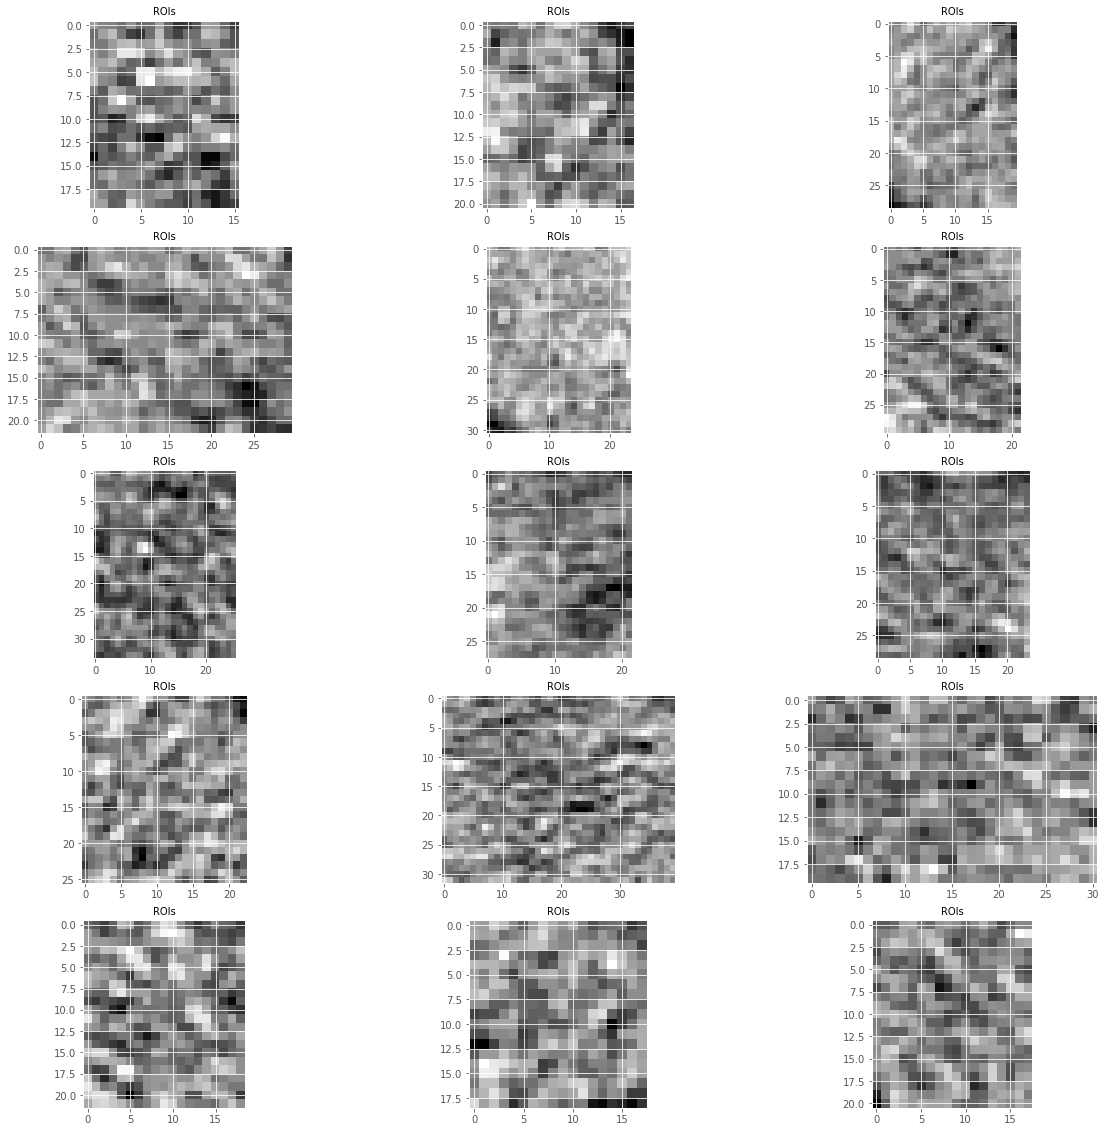

In [10]:
rows,cols=5,3
slice = 100
fig=plt.figure(figsize=(20,20))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img=data[i-1][0]
    plt.imshow(img,cmap='gray')
    plt.title("ROIs",fontsize = 10)
plt.show()

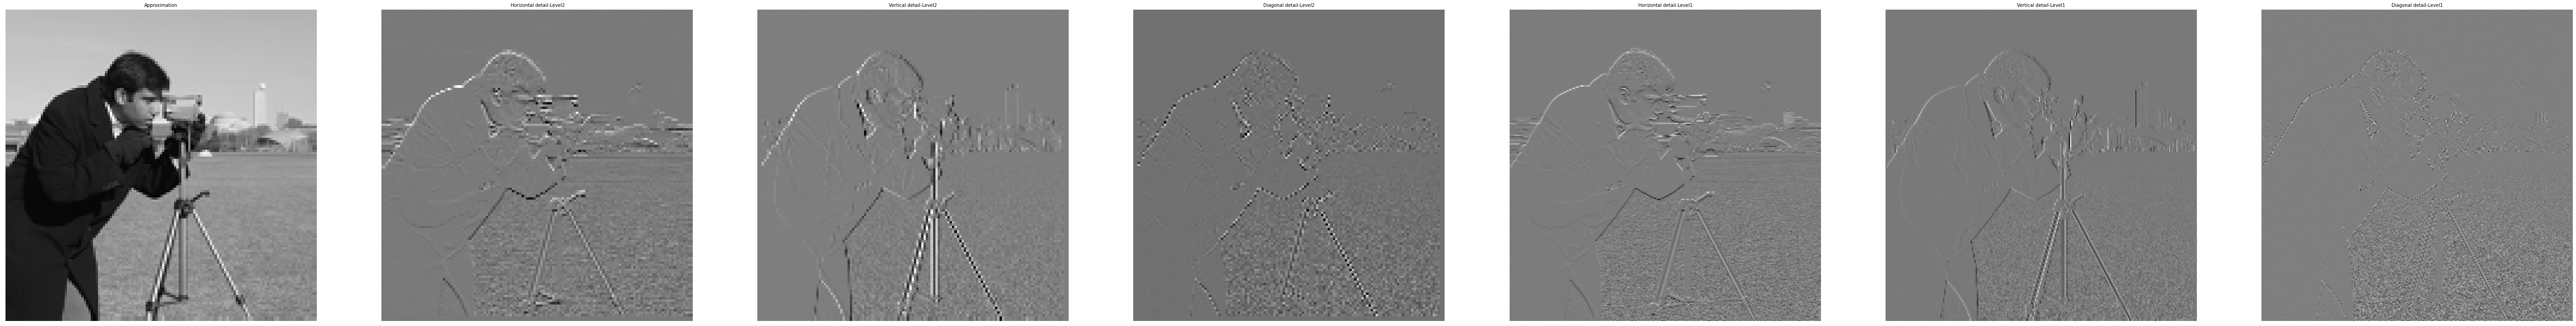

In [11]:

# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail-Level2',
          'Vertical detail-Level2', 'Diagonal detail-Level2', ' Horizontal detail-Level1',
          'Vertical detail-Level1', 'Diagonal detail-Level1']

coeffs2 = pywt.wavedec2(original, 'bior1.3', level=2)
LL, (LH2, HL2, HH2), (LH, HL, HH)= coeffs2
fig = plt.figure(figsize=(80, 10))
for i, a in enumerate([LL, LH2, HL2, HH2, LH, HL, HH]):
    ax = fig.add_subplot(1, 7, i + 1)
    #print(a.shape)
    ax.imshow(a, cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [12]:

def wavelet_components(input_image, wavelet_name = 'db3', is_plot = False ):
  coeffs1 = pywt.wavedec2(input_image, wavelet_name, level=1)
  A1, _ = coeffs1
  coeffs2 = pywt.wavedec2(input_image, wavelet_name, level=2)
  A2, (H2, V2, D2), (H1, V1, D1)= coeffs2
  if is_plot == True:
    titles = ['Approximation-Level2', ' Horizontal detail-Level2',
              'Vertical detail-Level2', 'Diagonal detail-Level2', 'Approximation-Level1', ' Horizontal detail-Level1',
              'Vertical detail-Level1', 'Diagonal detail-Level1']

    fig = plt.figure(figsize=(80, 10))
    for i, a in enumerate([A2, H2, V2, D2, A1, H1, V1, D1]):
        ax = fig.add_subplot(1, 8, i + 1)
        #print(a.shape)
        ax.imshow(a, cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=30)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.tight_layout()
    plt.show()
  return A2, H2, V2, D2, A1, H1, V1, D1

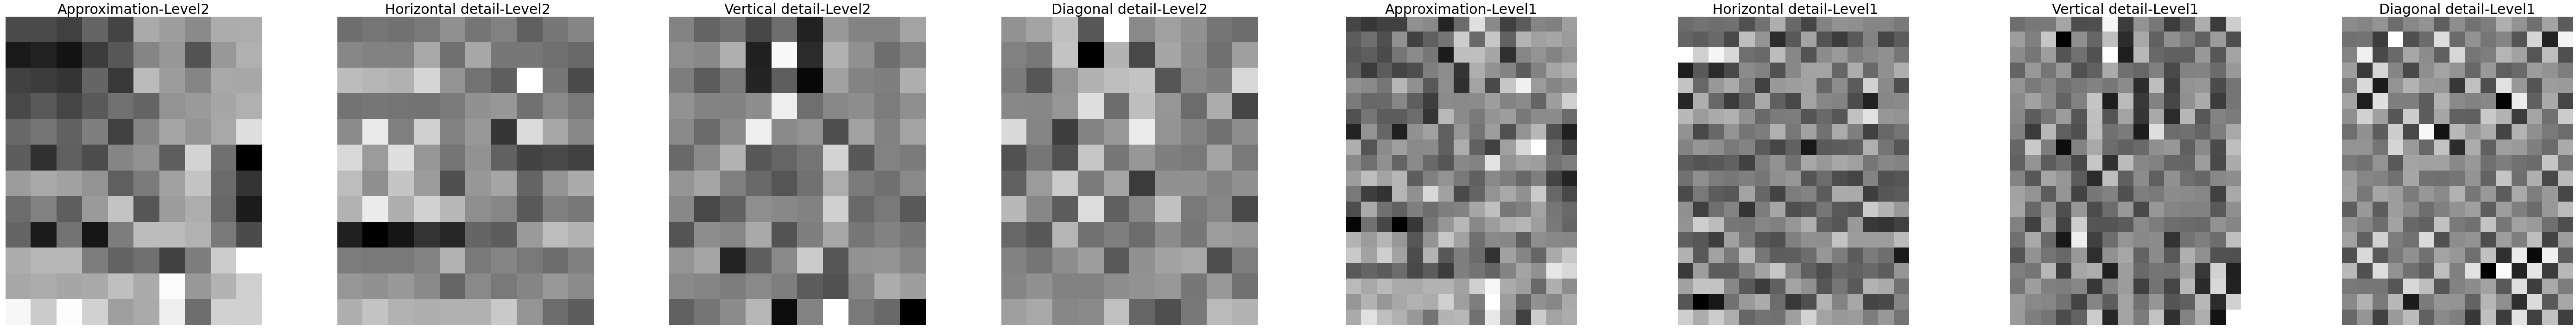

In [17]:
original = data[15][0]
A2, H2, V2, D2, A1, H1, V1, D1 = wavelet_components(original,is_plot=True)


In [18]:
print(A2)
print(np.min(A2))
print(np.max(A2))

[[457.92789836 457.97159592 452.45691375 471.3750862  454.29786515
  506.80282109 500.51857867 490.18834765 507.36462582 508.13900693]
 [432.01678301 437.09989932 429.11837145 450.64501947 464.71329768
  487.5944546  496.84441362 462.18113159 497.25832405 509.82583008]
 [453.31316341 449.98080467 446.32986858 471.06597981 448.151839
  514.96331696 499.29012994 487.73921499 505.49597541 505.09573477]
 [456.5701581  465.25661572 454.58668812 465.24427741 478.03525875
  470.61085403 494.94890936 498.38726287 504.54086628 509.92596307]
 [472.89437236 479.61378639 468.92504503 484.44690499 453.414575
  487.65032032 504.72701649 495.78934347 505.49063497 533.21763873]
 [467.23324037 444.6504289  468.0253142  458.26227113 487.64794394
  494.43511153 467.88280005 527.78552722 476.96551397 419.18997624]
 [499.2606198  505.99167163 501.9489114  494.87586252 467.941434
  482.71765095 502.10239939 519.99318115 474.4070655  446.42670924]
 [474.87505597 486.00179727 467.66457684 498.28139069 519.738

283
2


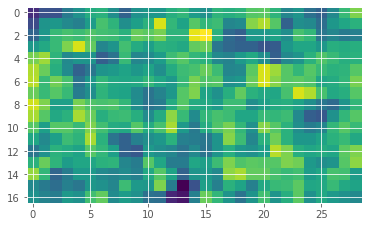

In [103]:
img = data[traindata_indices[109][0]][0]
print(traindata_indices[109][0])
label = traindata_labels[109][0]
plt.imshow(img)
print(label)

In [35]:
print(len(traindata_indices))

import warnings
warnings.filterwarnings("ignore")

218


In [36]:
A2_1_min = []; H2_1_min = []; V2_1_min = []; D2_1_min = []; A1_1_min = []; H1_1_min = [];  V1_1_min = []; D1_1_min = [];
A2_2_min = []; H2_2_min = []; V2_2_min = []; D2_2_min = []; A1_2_min = []; H1_2_min = [];  V1_2_min = []; D1_2_min = [];

A2_1_max = []; H2_1_max = []; V2_1_max = []; D2_1_max = []; A1_1_max = []; H1_1_max = [];  V1_1_max = []; D1_1_max = [];
A2_2_max = []; H2_2_max = []; V2_2_max = []; D2_2_max = []; A1_2_max = []; H1_2_max = [];  V1_2_max = []; D1_2_max = [];

nA = 0;
nB = 0;
for i in range(0,len(traindata_indices)):
  label = traindata_labels[i][0]
  if label == 1:
    image = data[traindata_indices[i][0]][0]
    A2, H2, V2, D2, A1, H1, V1, D1 = wavelet_components(image)
    nA+=1
    A2_1_min.append(np.min(A2));H2_1_min.append(np.min(H2));V2_1_min.append(np.min(V2));D2_1_min.append(np.min(D2));
    A1_1_min.append(np.min(A1));H1_1_min.append(np.min(H1));V1_1_min.append(np.min(V1));D1_1_min.append(np.min(D1));

    A2_1_max.append(np.max(A2));H2_1_max.append(np.max(H2));V2_1_max.append(np.max(V2));D2_1_max.append(np.max(D2));
    A1_1_max.append(np.max(A1));H1_1_max.append(np.max(H1));V1_1_max.append(np.max(V1));D1_1_max.append(np.max(D1));

  elif label == 2:
    image = data[traindata_indices[i][0]][0]
    A2, H2, V2, D2, A1, H1, V1, D1 = wavelet_components(image)
    nB+=1
    A2_2_min.append(np.min(A2));H2_2_min.append(np.min(H2));V2_2_min.append(np.min(V2));D2_2_min.append(np.min(D2));
    A1_2_min.append(np.min(A1));H1_2_min.append(np.min(H1));V1_2_min.append(np.min(V1));D1_2_min.append(np.min(D1));

    A2_2_max.append(np.max(A2));H2_2_max.append(np.max(H2));V2_2_max.append(np.max(V2));D2_2_max.append(np.max(D2));
    A1_2_max.append(np.max(A1));H1_2_max.append(np.max(H1));V1_2_max.append(np.max(V1));D1_2_max.append(np.max(D1));



In [37]:
s_A2_1 = np.mean(A2_1_min); s_H2_1 = np.mean(H2_1_min); s_V2_1 = np.mean(V2_1_min); s_D2_1 = np.mean(D2_1_min);
s_A1_1 = np.mean(A1_1_min); s_H1_1 = np.mean(H1_1_min); s_V1_1 = np.mean(V1_1_min); s_D1_1 = np.mean(D1_1_min);

t_A2_1 = np.mean(A2_1_max); t_H2_1 = np.mean(H2_1_max); t_V2_1 = np.mean(V2_1_max); t_D2_1 = np.mean(D2_1_max);
t_A1_1 = np.mean(A1_1_max); t_H1_1 = np.mean(H1_1_max); t_V1_1 = np.mean(V1_1_max); t_D1_1 = np.mean(D1_1_max);

s_A2_2 = np.mean(A2_2_min); s_H2_2 = np.mean(H2_2_min); s_V2_2 = np.mean(V2_2_min); s_D2_2 = np.mean(D2_2_min);
s_A1_2 = np.mean(A1_2_min); s_H1_2 = np.mean(H1_2_min); s_V1_2 = np.mean(V1_2_min); s_D1_2 = np.mean(D1_2_min);

t_A2_2 = np.mean(A2_2_max); t_H2_2 = np.mean(H2_2_max); t_V2_2 = np.mean(V2_2_max); t_D2_2 = np.mean(D2_2_max);
t_A1_2 = np.mean(A1_2_max); t_H1_2 = np.mean(H1_2_max); t_V1_2 = np.mean(V1_2_max); t_D1_2 = np.mean(D1_2_max);


s_A2 = min(s_A2_1,s_A2_2); s_H2 = min(s_H2_1,s_H2_2); s_V2 = min(s_V2_1,s_V2_2); s_D2 = min(s_D2_1,s_D2_2); 
s_A1 = min(s_A1_1,s_A1_2); s_H1 = min(s_H1_1,s_H1_2); s_V1 = min(s_V1_1,s_V1_2); s_D1 = min(s_D1_1,s_D1_2); 

t_A2 = max(t_A2_1,t_A2_2); t_H2 = max(t_H2_1,t_H2_2); t_V2 = max(t_V2_1,t_V2_2); t_D2 = max(t_D2_1,t_D2_2); 
t_A1 = max(t_A1_1,t_A1_2); t_H1 = max(t_H1_1,t_H1_2); t_V1 = max(t_V1_1,t_V1_2); t_D1 = max(t_D1_1,t_D1_2); 


print(nA,nB)
print(s_A2,t_A2);print(s_H2,t_H2);print(s_V2,t_V2);print(s_D2,t_D2);
print(s_A1,t_A1);print(s_H1,t_H1);print(s_V1,t_V1);print(s_D1,t_D1);

107 111
393.6404004303934 576.9453684679481
-51.87287755769847 53.27068520831366
-48.30007435987143 48.02735446740749
-32.885814154162226 33.327073037163814
179.35585854090414 308.89876729749517
-24.87955897145805 25.562996149422414
-23.00081120729282 22.94012289949932
-9.786405535671925 9.450213847702843


In [87]:
number_of_bins = 8
def bins(minimum,maximum,no_of_bins):
  w = (maximum - minimum) / no_of_bins
  arr = []
  for i in range(0, no_of_bins+1):
    arr = arr + [minimum + w * i]
  return arr

[393.6404004303934, 416.55352143508776, 439.4666424397821, 462.37976344447645, 485.29288444917074, 508.20600545386515, 531.1191264585594, 554.0322474632537, 576.9453684679481]


[[508.05317714 533.49819882 507.07837757 521.73842396 520.65555312
  486.65303631 475.34913412 510.40521995 453.81800006 406.7321843 ]
 [492.374404   559.2588751  492.67815163 522.61442172 535.69059933
  510.30283108 514.87209615 501.08201393 461.95159474 497.13021823]
 [499.22883701 534.50236136 494.55146029 529.36547823 525.30747465
  479.88652359 474.40774029 511.02676374 440.84270501 385.01284133]
 [518.09894023 544.16435303 524.50326195 509.94229008 503.96949602
  502.50894984 496.05021031 495.77082558 488.17714396 516.02741406]
 [498.08638012 505.09190178 490.50931617 516.07346122 495.97167828
  456.00738699 475.48689157 491.70573739 436.35960844 527.94138863]
 [482.69228886 461.28922901 484.29500211 465.50301243 483.93533365
  512.24211183 482.5465231  484.07238393 510.737552   469.55669067]
 [495.16820854 457.94506639 492.3738213  476.59535541 479.38342594
  480.25623026 482.10859744 515.48651312 486.63881559 449.80934739]
 [488.5596334  461.37820736 485.4962089  487.12182006 4

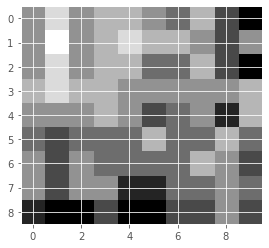

In [88]:
image = data[traindata_indices[120][0]][0]
interval = bins(s_A2, t_A2, number_of_bins)
print(interval)
A2_new_1 = np.digitize(A2,interval[1:-1])
plt.imshow(A2_new_1,cmap='gray')
print(A2)
print(A2_new_1)